# Transition Dynamics with Heterogeous Agents
<style type="text/css">
  .reveal p {
    text-align: left;
  }
  .reveal ul {
    display: block;
  }
  .reveal ol {
    display: block;
  }
</style>
# Perfect Foresight Equilibrium

## Overview

* In heterogeneous agent models we are more interested in more than just long run steady state

* Care also about the transition dynamics to a new steady state

* Several reasons for this:
    * Allows analysis of policy, i.e. start in steady state, change tax policy, what is wealfare from transition

    * Response of economy to a one time unanticipated shock -- approximates a linearization

* We'll study the response of the economy to a transitory increase in TFP


## The Household Problem
* Assume a unit mass of households 

* Households differ in
    * their current wealth position, $a_{i,t}$
    * their labor productivity, $\epsilon_{i,t}$

* Assume that labor productivity follows a finite state Makov process
    * transition matrix $\Pi$

* Receives a wage rate $w_t$ per unit of effective labor
    * total labor income $w_t \epsilon_{i,t}$ (note now depends on time)

* Have the ability save with a bond
    * risk free interest rate $r_t$
    * up to borrowing constraint $\underline a$

* Assumption: $r_t,w_t\rightarrow \bar r,\bar w$

## Bellman Equation
* Let $V_t(a,s)$ be the value to the household of entering period $t$
    * with wealth $a$
    * current labor productivity $\epsilon_s$

* The HH value equation solves the following Bellman equation
$$
    V_t(a,s) = \max_{c,a'} u(c) + \beta \sum_{s'} \Pi(s'|s)V_{t+1}(a',s')
$$
subject to 
$$
    c + a' = (1+r_t) a + w_t \epsilon_s 
$$
and 
$$
    a'\geq \underline a
$$
* Note dependence on $t$ because economy is transitioning to steady state in long run 

## Production
* Production is produced by a representative firm endowed with a CRS production function $F_t(K_t,N_t)$
    * hires effective labor from HH at a wage rate $w_t$
    * hires capital from HH at rental rate $r_t + \delta$
    * Usually $F_t(K_t,N_t) = \Theta_t K_t^\alpha N_t^{1-\alpha}$

* No arbitrage conditions imply that 
\begin{align}
    w_t &= F_{t,N}(K_t,N_t)\\
    r_t &= F_{t,K}(K_t,N_t) - \delta
\end{align}

* Household savings therefore pay a gross interest rate $R_t=1+r_t$

* Solving for transition: capital stock, and therefore prices, vary over time
    * Need to find path of distribution of HH wealth

## Dynamics of Distribution of HHs
* Consider the behavior of agents under the policy rules $a'_t(a,s)$ and transition matrix $\Pi(s,s')$

* Let $\Omega_t$ describe the current distribution of agents
    * $\\Omega_t(a,s)$ is the fraction of agents with productivity $\epsilon_s$ and assets less than or equal to $a$
    * more generally $\Omega_t$ could be a measure

* Under the stationary policy rules $a'_t(a,s)$, $\Omega_t$ evolves according to 
$$
    \Omega_{t+1}(a',s') = \sum_s \Pi(s,s')\int\iota(a'_t(a,s)\leq a')\Omega_t(da,s)
$$
where $\iota(a'_t(a,s)\leq a')$ is an indicator which is 1 if $a'_t(a,s)\leq a'$ and 0 overwise.

* Note: an initial condition for this equilibrium will be $\Omega_0$.

## The Exogenous Shock
* We'll assume that economy is initially in steady state: $\Omega_0 = \bar \Omega$ and $\bar \Theta = 1.$

* At time $0$ there is a one-time unexpected 5% increase in TFP:
$$
    \ln\Theta_0 = 0.05
$$

* TFP then mean reverts back to long run mean
$$
    \ln\Theta_t = \rho_\Theta \ln \Theta_{t-1}
$$

* What is the resulting path of prices and quantities?

## Perfect Foresight Equilibrium
A *Perfect Foresight Equilibrium* given an initial distribution $\lambda_0$ and productivity $\Theta_0$ is a path of prices $\{r_t,w_t\}$; a path of value functions and policy rules $\{v_t(a,s),c_t(a,s),a'_t(a,s)\}$; paths of aggregates
aggregates $\{K_t,N_t\}$; and a path of the distribution $\{\Omega_t\}$ such that

1. Given prices the value function and policy rules solve the HH's Bellman equation

2. $r_t$,$w_t$ satisfy the no-arbitrage condition of the firm given $\Theta_t$ and $K_t$

3. The distribution evolves according to $a'_t(a,s)$ and $\Pi(s'|s)$
$$
\Omega_{t+1}(a',s') = \sum_s \Pi(s'|s)\int\iota(a'_t(a,s)\leq a')\Omega_t(da,s)
$$

4. The labor market clears
$$
    N = \sum_s\int \epsilon_s \Omega_t(da,s)
$$

5. The asset market clears
$$
    K_t = \sum_s\int a \Omega_t(da,s)
$$

6. $\Theta_t$ evolves according to $\ln\Theta_t=\rho_\Theta\ln\Theta_{t-1}$ and $\Theta_0$


# Approximating the Perfect Foresight Equilibrium

## Overview
* Compute steady state of the economy: $(\bar r,\bar w,\bar K, \bar \Omega)$

* Assume economy is initially in steady state: $\Omega_0 =\bar \Omega$ and $K_0=\bar K$

* Path of productivity follows $\ln\Theta_t=\rho_\Theta\ln\Theta_{t-1}$ with $\ln\Theta_0=0.05$

* Assume after $T$ periods economy returns to steady state $r_{T+1}=\bar r$, $w_{T+1}=\bar w$, $K_{T+1} = \bar K$, and $\Omega_{T+1} = \bar \Omega$.

* Objective is to find $\{r_t,w_t,K_t,\Omega_t\}_{t=0}^T$ that satisfy HH problem etc. given that economy is in steady state for $t>T$.
    * Note only need path of $K_t$ since all other variables can be computed from $K_t$

## First Find Steady State: HH Problem

In [1]:
using BasisMatrices,LinearAlgebra,Parameters,Optim,QuantEcon,DataFrames,StatsPlots,SparseArrays,Arpack,Roots
default(linewidth=2,legend=false)
@with_kw mutable struct HHModel
    #Preference Parameters
    γ::Float64 = 1. #Risk aversion
    β::Float64 = 0.985 #Discount Rate

    #Prices
    r̄::Float64 = .01 #quarterly
    w̄::Float64 = 1.

    #Asset Grid Parameters
    a̲::Float64 = 0. #Borrowing Constraint
    a̅::Float64 = 600. #Upper Bound on assets
    Na::Int64 = 100 #Number of grid points for splines

    #Income Process
    ρ_ϵ::Float64 = 0.9923 #calibrated to quarterly wage regressions
    σ_ϵ::Float64 = 0.0983
    Nϵ::Int64 = 7
    ϵ::Vector{Float64} = zeros(0)
    Π::Matrix{Float64} = zeros(0,0)

    #Solution
    k::Int = 2 #type of interpolation
    Vf::Vector{Interpoland} = Interpoland[]
    cf::Vector{Interpoland} = Interpoland[]

    #Extra
    EΦ′::SparseMatrixCSC{Float64,Int64} = spzeros(0,0)
    Φ::SparseMatrixCSC{Float64,Int64} = spzeros(0,0)
end;

"""
    U(HH::HHModel,c)
"""
function U(HH::HHModel,c)
    γ = HH.γ
    if γ == 1
        return log.(c)
    else
        return (c.^(1-γ))./(1-γ)
    end
end

"""
    setupgrids_shocks!(HH::HHModel, curv=1.7)

Set up non-linear grids for interpolation
"""
function setupgrids_shocks!(HH::HHModel, curv=1.7)
    @unpack a̲,a̅,Na,ρ_ϵ,σ_ϵ,Nϵ,k,r̄,w̄,β = HH
    #Compute grid on A
    agrid = (a̅-a̲).*LinRange(0,1,Na).^curv .+ a̲

    #Store markov chain
    mc = rouwenhorst(Nϵ,ρ_ϵ,σ_ϵ)
    HH.Π = Π = mc.p
    HH.ϵ = exp.(mc.state_values)

    #First guess of interpolation functions
    abasis = Basis(SplineParams(agrid,0,k))
    a = nodes(abasis)[1]

    Vf = HH.Vf = Vector{Interpoland}(undef,Nϵ)
    cf = HH.cf = Vector{Interpoland}(undef,Nϵ)
    for s in 1:Nϵ
        c = @. r̄*a + w̄*HH.ϵ[s]
        V = U(HH,c)./(1-β)

        Vf[s]= Interpoland(abasis,V)
        cf[s]= Interpoland(abasis,c)
    end
end;

"""
    iterate_endogenousgrid(HH,a′grid,cf′)

Iterates on Euler equation using endogenous grid method
"""
function iterate_endogenousgrid(HH,a′grid,cf′)
    @unpack γ,ϵ,β,Nϵ,Π,r̄,w̄,a̲= HH
    c′ = zeros(length(a′grid),Nϵ)
    for s in 1:Nϵ
        c′[:,s]= cf′[s](a′grid)
    end

    EERHS = β*(1+r̄)*(c′).^(-γ)*Π' #RHS of Euler Equation
    c = EERHS.^(-1/γ)

    #compute implies assets
    a = ((c .+ a′grid) .- w̄ .*ϵ')./(1+r̄)

    cf = Vector{Interpoland}(undef,Nϵ)
    for s in 1:Nϵ
        if a[1,s]> a̲
            c̲ = r̄*a̲ + w̄*ϵ[s]
            cf[s]= Interpoland(Basis(SplineParams([a̲; a[:,s]],0,1)),[c̲;c[:,s]])
        else
            cf[s]= Interpoland(Basis(SplineParams(a[:,s],0,1)),c[:,s])
        end
    end
    return cf
end;

"""
    solveHHproblem_eg!(HH)

Solves the HH problem using the endogeneous grid method
"""
function solveHHproblem_eg!(HH,verbose=false)
    a′grid = nodes(HH.Vf[1].basis)[1]#Get nodes for interpolation
    
    cf′ = iterate_endogenousgrid(HH,a′grid,HH.cf)
    diff = 1.
    while diff  > 1e-8
        HH.cf = iterate_endogenousgrid(HH,a′grid,cf′)
        diff = maximum(norm(cf′[s](a′grid)-HH.cf[s](a′grid),Inf) for s in 1:HH.Nϵ) 
        if verbose
            println(diff)
        end
        cf′ = HH.cf
    end
end
HH = HHModel()
setupgrids_shocks!(HH,3.)
solveHHproblem_eg!(HH)

## Solving for the Steady State

In [2]:
@with_kw mutable struct AiyagariModel
    HH::HHModel = HHModel()

    #Production Parameters
    α::Float64 = 0.3
    δ::Float64 = 0.025
    Θ̄::Float64 = 1.
    ρ_Θ::Float64 = 0.85

    #Moments to match/prices
    W̄::Float64 = 1.
    R̄::Float64 = 1.01
    K2Y::Float64 = 10.2 #capital to output ratio
    N̄::Float64 = 1.
    K̄::Float64 =1.

    #Distribution Parameters
    Ia::Int = 1000 #Number of gridpoints for distribution
    z̄::Matrix{Float64} = zeros(0,0) #Gridpoints for the state variables
    ω̄::Vector{Float64} = zeros(0) #Fraction of agents at each grid level
    H::SparseMatrixCSC{Float64,Int64} = spzeros(Ia,Ia) #Transition matrix
end;

"""
    setupgrids_shocks!(AM::AiyagariModel)

Setup the grids and shocks for the aiyagari model
"""
function setupgrids_shocks!(AM::AiyagariModel,curv=2.)
    @unpack HH,Ia,N̄= AM
    @unpack a̲,a̅,Nϵ = HH
    setupgrids_shocks!(HH)
    #Normalize so that average labor supply is 1
    πstat = real(eigs(HH.Π',nev=1)[2])
    πstat ./= sum(πstat)
    HH.ϵ = HH.ϵ./dot(πstat,HH.ϵ)*N̄
    #Grid for distribution
    agrid = (a̅-a̲).*LinRange(0,1,Ia).^curv .+ a̲
    AM.z̄ = hcat(kron(ones(Nϵ),agrid),kron(1:Nϵ,ones(Ia)))
    AM.ω̄ = ones(Ia*Nϵ)/(Ia*Nϵ)
end;

"""
    find_stationarydistribution!(AM::AiyagariModel,V)

Computes the stationary distribution 
"""
function find_stationarydistribution!(AM::AiyagariModel)
    @unpack Ia,z̄,HH,W̄,R̄ = AM
    @unpack ϵ,Π,Nϵ,cf,a̲,a̅ = HH

    a = z̄[1:Ia,1] #grids are all the same for all shocks
    c = hcat([cf[s](a) for s in 1:Nϵ]...) #consumption policy IaxNϵ
    a′ = R̄.*a .+ W̄.*ϵ' .- c #create a IaxNϵ grid for the policy rules
    
    #make sure we don't go beyond bounds.  Shouldn't bind if bmax is correct
    a′ = max.(min.(a′,a̅),a̲)
    
    Qa = BasisMatrix(Basis(SplineParams(a,0,1)),Direct(),reshape(a′,Ia*Nϵ)).vals[1]
    Q = spzeros(Ia*Nϵ,Ia*Nϵ)
    for s in 1:Nϵ
        Q[1+(s-1)*Ia:s*Ia,:] = kron(reshape(Π[s,:],1,:),Qa[1+(s-1)*Ia:s*Ia,:]) 
    end
    
    AM.H = Q'
    AM.ω̄ .= real(eigs(AM.H;nev=1)[2])[:]
    AM.ω̄ ./= sum(AM.ω̄) #normalize eigenvector
end;

function calibratesteadystate!(AM)
    @unpack Θ̄,α,N̄,K2Y,R̄ = AM
    AM.HH.r̄ = R̄ - 1
    Y2K = 1/K2Y
    AM.δ = α*Y2K + 1 - R̄ #matching capital to output ratio and interest rate gives depreciation rate
    K2N = (Y2K/Θ̄)^(1/(α-1)) #relationship between capital to output and capital to labor
    K̄ = AM.K̄ = K2N*N̄
    AM.W̄ = AM.HH.w̄ = (1-α)*Θ̄*K2N^α

    setupgrids_shocks!(AM)
    function βres(β)
        AM.HH.β=β
        solveHHproblem_eg!(AM.HH)
        find_stationarydistribution!(AM)
        return dot(AM.ω̄,AM.z̄[:,1]) -K̄
    end

    Q̄ = 1/R̄
    AM.HH.β =fzero(βres,Q̄^2,Q̄^1.2)
    solveHHproblem_eg!(AM.HH)
    find_stationarydistribution!(AM)
    return AM.HH.β
end

AM = AiyagariModel()
AM.R̄ = 1.01 #target a quarterly interest rate of 1%
AM.HH.β = 0.99
setupgrids_shocks!(AM)
calibratesteadystate!(AM)

0.9860241301973195

## Solve Transition - Modified Endogeneous Grid
* We can modify the endogenous grid method to deal with the transition

* Let $c_t(a,s)$ and $a'_t(a,s)$ be the consumption and asset policies that solves the HH problem at time $t$

* They must satify
$$
    c_t(a,s) + a'_t(a,s) = (1+r_t)a + \epsilon_sw_t
$$
and 
$$
    U'(c_t(a,s)) \geq \beta(1+r_{t+1})\sum_{s'}\Pi(s'|s) U'(c_{t+1}(a'_t(a,s),s'))
$$
with strict inequality only if 
$$
    a'_t(a,s) = \underline a
$$

In [3]:
"""
    iterate_endogenousgrid_transition(HH,a′grid,cf′,r,w,r′)

Iterates on Euler equation using endogenous grid method
"""
function iterate_endogenousgrid_transition(HH,a′grid,cf′,r,w,r′)
    @unpack γ,ϵ,β,Nϵ,Π,a̲= HH
    c′ = zeros(length(a′grid),Nϵ)
    for s in 1:Nϵ
        c′[:,s]= cf′[s](a′grid)
    end

    EERHS = β*(1+r′)*(c′).^(-γ)*Π' #RHS of Euler Equation
    c = EERHS.^(-1/γ)

    #compute implies assets
    a = ((c .+ a′grid) .- w .*ϵ')./(1+r)

    cf = Vector{Interpoland}(undef,Nϵ)
    for s in 1:Nϵ
        if a[1,s]> a̲
            c̲ = r*a̲ + w*ϵ[s]
            cf[s]= Interpoland(Basis(SplineParams([a̲; a[:,s]],0,1)),[c̲;c[:,s]])
        else
            cf[s]= Interpoland(Basis(SplineParams(a[:,s],0,1)),c[:,s])
        end
    end
    return cf
end;

## Solve Transition - Compute Consumption Path

* Next we need to compute the consumption path given a path of prices ${r_t,w_t}$

In [4]:
"""
    compute_consumption_path(AM,rt,wt)

Computes path of prices given 
"""
function compute_consumption_path(AM,rt,wt)
    HH = AM.HH
    T = length(rt)
    cft = Matrix{Interpoland}(undef,AM.HH.Nϵ,T)
    #First compute last period using steady state as continuation
    a′grid = nodes(HH.Vf[1].basis)[1]#Get nodes for interpolation
    cft[:,T] =  iterate_endogenousgrid_transition(HH,a′grid,HH.cf,rt[T],wt[T],HH.r̄)
    
    #Next compute consumption in all previous periods working backwards
    for t in reverse(1:T-1)
        cft[:,t] .= iterate_endogenousgrid_transition(HH,a′grid,cft[:,t+1],rt[t],wt[t],rt[t+1])
    end

    return cft
end

compute_consumption_path

## Solve Transition - Iterate Distribution Forward
* Given consumption path $c_t(a,s)$ can find compute $\omega_{t,i,s}$
    * Fraction of agents at time $t$ who have assets $\hat a_i$ and productivity $\epsilon_s$

In [5]:
"""
    iterate_distribution(AM::AiyagariModel,cf,λ,r,w)

Computes next periods distribution given current consumption function
"""
function iterate_distribution(AM::AiyagariModel,cf,ω,r,w)
    @unpack Ia,z̄,HH = AM
    @unpack ϵ,Π,Nϵ,a̲,a̅ = HH

    a = z̄[1:Ia,1] #grids are all the same for all shocks
    c = hcat([cf[s](a) for s in 1:Nϵ]...) #consumption policy IaxNϵ
    a′ = (1+r)*a .+ w.*ϵ' .- c #create a IaxNϵ grid for the policy rules
    
    #make sure we don't go beyond bounds.  Shouldn't bind if bmax is correct
    a′ = max.(min.(a′,a̅),a̲)
    
    Qa = BasisMatrix(Basis(SplineParams(a,0,1)),Direct(),reshape(a′,Ia*Nϵ)).vals[1]
    Q = spzeros(Ia*Nϵ,Ia*Nϵ)
    for s in 1:Nϵ
        Q[1+(s-1)*Ia:s*Ia,:] = kron(reshape(Π[s,:],1,:),Qa[1+(s-1)*Ia:s*Ia,:]) 
    end
    
    return Q'*ω
end;

## Solve Transition - Find Path of Capital

In [6]:

"""
    compute_capital_path(AM,rt,wt)

Computes path of prices given 
"""
function compute_capital_path(AM,cft,rt,wt)
    @unpack HH,z̄,ω̄ = AM
    T = length(rt)
    N = length(AM.ω̄)
    ωt = zeros(N,T+1)
    ωt[:,1] = AM.ω̄ #starting at steady state distribution
    for t in 1:T
        ωt[:,t+1] = iterate_distribution(AM,cft[:,t],ωt[:,t],rt[t],wt[t])
    end
   
    return (z̄[:,1]'*ωt)'
end

compute_capital_path

## Solve Transition

* Finally compute fixed point of capital path

* Let $K_t^j$ be the $j^{th}$ iteration for the path of capital

* Compute $r_t,w_t$ associated with that guess from no-arbitrage conditions

* Compute associated $c_t(a,s)$ backwards and then iterate forwards on distribution to get $\lambda_t(a,s)$

* Gives implied path of capital $\hat K_t$, update guess
$$
    K^{j+1}_t = (1-\xi)*K^j_t + \xi*\hat K_t 
$$

In [7]:
"""
    solve_transition(AM,lnΘ0=0.05,T=200)

Solves for the perfect foresight equilibrium
"""
function solve_transition(AM,lnΘ0=0.05,T=200)
    @unpack α,δ = AM
    Θt = exp.([lnΘ0*AM.ρ_Θ^(t-1) for t in 1:T])
    Kt = ones(T).*AM.K̄ #initialize guess as constant capital
    
    diff = 1
    ξ = 0.1
    while diff > 1e-4
        rt = α.*Θt.*Kt.^(α-1) .- δ
        wt = (1-α).*Θt.*Kt.^(α)

        cft = compute_consumption_path(AM,rt,wt)
        K̂t = compute_capital_path(AM,cft,rt,wt)
        diff = norm(Kt-K̂t[1:T],Inf)

        Kt = (1-ξ).*Kt .+ ξ.*K̂t[1:T]
    end
    rt = α.*Θt.*Kt.^(α-1) .- δ
    wt = (1-α).*Θt.*Kt.^(α)
    return Θt,Kt,rt,wt
end

solve_transition

## Transition Dynamics 

In [24]:
Θt,Kt,rt,wt = solve_transition(AM,0.05,200);

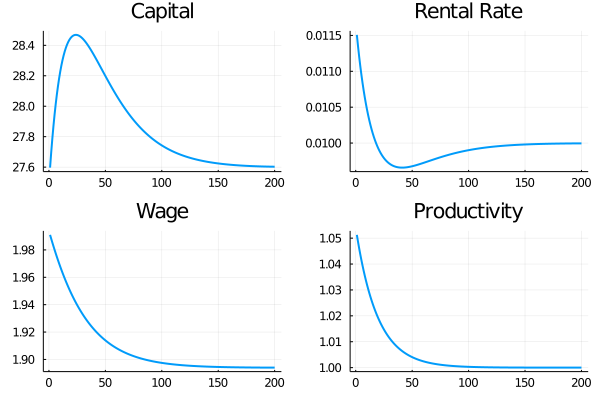

In [25]:
plot(Kt,layout=4,subplot=1,title="Capital")
plot!(rt,subplot=2,title="Rental Rate")
plot!(wt,subplot=3,title="Wage")
plot!(Θt,subplot=4,title="Productivity")

# Stochastic Equilibirum

* We can use the transition path to approximate equilibrium dynamics if economy is continually buffeted by aggregate shocks

* Let $\bar X^\epsilon_t$ be the path of an aggregate variable be the path of the aggregate variable in response to an unexpected in increase in productivity at time $0$:
$$
    \ln \Theta_0 = \epsilon
$$ 

* Define $d\bar X_t = \lim_{\epsilon\rightarrow0}\frac{\bar X^\epsilon_t-\bar X}{\bar X}$
    * This is the linearized response to a TFP shock.  
    * Can approximate this with a small $\epsilon$ (numeric derivative)

* Can then approximate lineazized DSGE model with heterogeneous agents when TFP follows an ar1 process $\ln\Theta_t=\rho_\Theta \Theta_{t-1} +\mathcal E_t$:
$$
    \hat X_t = \sum_{j=0}^Td\bar X_j\mathcal E_{t-j}
$$

## Numeric Derivative

In [26]:
ϵ = 1e-4
Θt,Kt,rt,wt = solve_transition(AM,ϵ,200);
dΘ̄ = (Θt.-1)./ϵ
dK̄ = (Kt.-AM.K̄)./ϵ
dr̄ = (rt.-AM.HH.r̄)./ϵ
dw̄ = (wt.-AM.HH.w̄)./ϵ 

200-element Vector{Float64}:
 1.8933689308364698
 1.8356938811847634
 1.7797254304285914
 1.7254149747980563
 1.6727141742367557
 1.6215765002125515
 1.5719565968685956
 1.5238102463155379
 1.477094573012483
 1.4317678336750461
 ⋮
 0.0022320353210147914
 0.0021646867698343897
 0.0021013980422424083
 0.0020420973712020896
 0.0019867218714608725
 0.0019352178459719482
 0.0018875411833541023
 0.001843657995159731
 0.0018035454418807717

## Simulation with the Numeric Derivative

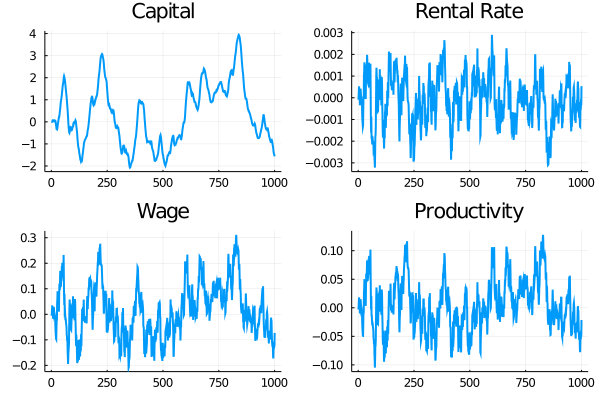

In [27]:
T = 1000
σ_Θ = 0.015
Tlin = length(dK̄)
Θt,Kt,rt,wt = zeros(T+Tlin),zeros(T+Tlin),zeros(T+Tlin),zeros(T+Tlin)

#now simulate
for t in 1:T
    ε = randn()*σ_Θ
    Θt[t:t+Tlin-1] .+= dΘ̄.*ε
    Kt[t:t+Tlin-1] .+= dK̄.*ε
    rt[t:t+Tlin-1] .+= dr̄.*ε
    wt[t:t+Tlin-1] .+= dw̄.*ε
end
plot(Kt[1:T],layout=4,subplot=1,title="Capital")
plot!(rt[1:T],subplot=2,title="Rental Rate")
plot!(wt[1:T],subplot=3,title="Wage")
plot!(Θt[1:T],subplot=4,title="Productivity")

## Check Non-linearities
* Can also use IRF to check non-linearities
* Compare non-linear perfect foresight to linearized impulse responses

In [28]:
Θt,Kt,rt,wt = solve_transition(AM,σ_Θ,200);

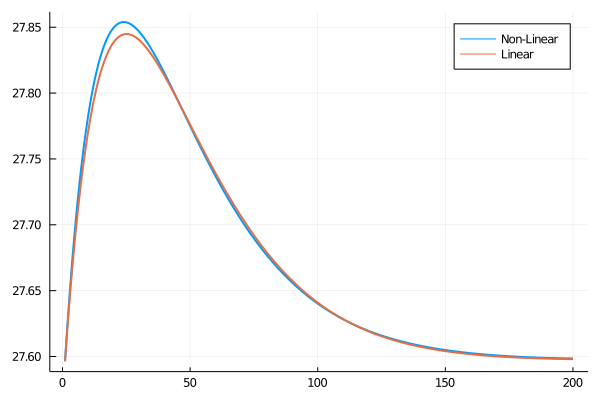

In [29]:
plot(Kt,label="Non-Linear")
plot!(dK̄.*σ_Θ.+AM.K̄,label="Linear",legend=true)